In [50]:
from dilipy.dilithium import *
pk, sk, s1, s2, A, t1, t0, t = Dilithium2.keygen()

In [51]:
msg = b"Signed by dilithium"
sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)
check_verify, Az_minus_ct1, w_prime = Dilithium2.verify(pk, msg, sig)
check_verify

True

In [52]:
def nonzero(a):
    return sum( list(a) )
c_tilde, z, h = Dilithium2._unpack_sig(sig)
alpha = Dilithium2.gamma_2 << 1
print(f"alpha: {Dilithium2.gamma_2*2}\ngamma_2: {Dilithium2.gamma_2}")
signp = w - s2.scale(c) + t0.scale(c)
h2 = (-t0.scale(c)).make_hint(signp, alpha).transpose()
print(f"h:  {h[1,0]}\n{nonzero( h[0,0] )}")
print(f"h2: {list(h2[0,0])}\n{nonzero( h2[0,0] )}")
h == h2                                                                                                                                                                                                       

alpha: 190464
gamma_2: 95232
h:  x^11 + x^19 + x^27 + x^36 + x^48 + x^69 + x^73 + x^74 + x^80 + x^96 + x^126 + x^166 + x^183 + x^188 + x^190 + x^199 + x^213 + x^236
18
h2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
18


True

In [53]:
def rec_fromhighbit(a, bit=13):
    return a * 2^bit
def lift(a: list):
    q = 8380417
    return [ (x if x <= round(q/2) else x - q) for x in a ]
print("t1:")
print(rec_fromhighbit(t1[0,0][0]))
print(t[0,0][0])
rec_fromhighbit(t1[0,0][0]-1) - t[0,0][0]
print(list(t0[0,0]))

t1:
4939776
4938557
[-1219, 3166, 2244, -1847, 3264, 2425, -3420, -774, -434, 464, -2238, 1932, 991, -2146, -1147, -2310, -986, 2187, 58, -2227, 3651, 741, -2543, 2087, -286, -899, 59, -2196, -2457, -1810, 1003, 4061, 1584, 611, -2067, 597, -2454, 2164, 2358, 2325, -1455, 3339, 1356, -214, 1914, -3031, -1903, -51, 1744, 1349, 4017, -3985, 2904, 2352, 3119, -1411, 1317, 1969, 3030, -3465, 2137, -2933, -4065, -3406, 2244, 2348, -3248, -1094, -3066, 885, 2087, 1095, 2048, -3919, -2999, -1269, 2854, -2432, -51, 895, -2679, 3244, 1227, 3930, -2804, -1210, 284, 520, -1385, -3401, -3268, 1744, 805, -3537, 2630, -1641, -1075, -810, 1071, 110, -3195, -748, 641, -3740, 749, -867, -1008, 86, -1470, -1864, -3658, -657, -1373, 2464, -1953, 3234, 3633, 1036, 2246, 13, -2097, -1151, -1477, -4075, 2830, -2262, 1084, -1804, 361, 1526, -2607, -2904, 4095, -3836, -769, -1712, 1975, 2772, -2038, 337, 3352, 2153, 3700, -3046, -511, 1944, 2123, 2990, -1561, 1195, -4071, -1074, -2395, -2502, -2937, 493, -472

In [54]:
ct0 = -t0.scale(c)
print(f"-ct0: {lift(list(ct0[0,0]))}")
print(f"w-cs2+ct0: {list(signp[0,0])}")
rho, t1_unpack = Dilithium2._unpack_pk(pk)
print(t1 == t1_unpack)
t1_unpack = t1_unpack.scale(int(int(1) << Dilithium2.d))
Az_ct1 = (A @ z)- (t1_unpack.scale(c))
print(Az_ct1 == signp)
print(2^12 * Dilithium2.tau)
beta = Dilithium2.tau * Dilithium2.eta
print(f"beta: {beta}")
basebound = Dilithium2.gamma_2 - beta
print(f"basebound γ_2 − β: {basebound}")

-ct0: [5991, -9307, -11252, 7602, 27528, -14957, -5362, 9543, 2197, -4058, 21586, -14657, 11656, -16827, 5238, 24638, -7398, 16330, -28421, -9295, -27641, -2914, -10878, 9489, -27247, 22297, 11941, -8832, 9057, -6363, 29276, 13841, -906, -2292, -16313, -2437, 12124, -2167, 12804, -13769, 18415, 6070, 37044, -13774, 15117, 17034, -6135, -6964, -21988, 12098, -23237, 3272, -2546, 32477, -19626, 23384, -42744, 20825, -21972, 12090, -16486, -8574, -28019, 6568, 278, 1054, -22479, 8004, 49196, -10282, 25054, 2284, 11947, -10487, 2778, -409, 22426, -22033, -9463, -1398, -1413, 14055, -18947, 11037, -33835, -33880, 10551, 4496, -8071, 6062, 10688, 35514, 9884, 11975, -21690, -510, -18796, -10687, -12244, -25607, -16197, -9533, 26537, -15826, -3206, -6063, -10251, 296, 30180, 25803, -7444, 496, -26826, 11553, 1972, -35558, -5530, -1816, 11286, 5076, 27264, 20949, -18696, -135, 1617, -1658, -29621, -2919, -5611, 18807, 9775, 11293, 18716, 1128, 21091, 4368, 17366, -6017, -21646, 12618, -30945, 

In [55]:
allct0 = [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
for i in range(50):
    msg = b"Signed by dilithium111" + (str(i)).encode()
    sig, c, z, y, w, w0, w1 = Dilithium2.sign(sk, msg)

    allct0 += [x for i, j in zip(range(4), [0] * 4) for x in lift(-t0.scale(c)[i, j])]
# allct0 = lift(-t0.scale(c)[0, 0])
print(allct0)
from collections import Counter
import matplotlib.pyplot as plt

# 统计 allct0 中每个数值的出现次数
counter = Counter(allct0)
print(counter)
sorted_counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
print(sorted_counter)
# 提取 x (values) 和 y (frequencies)
x_values = list(counter.keys())
y_values = list(counter.values())

[5991, -9307, -11252, 7602, 27528, -14957, -5362, 9543, 2197, -4058, 21586, -14657, 11656, -16827, 5238, 24638, -7398, 16330, -28421, -9295, -27641, -2914, -10878, 9489, -27247, 22297, 11941, -8832, 9057, -6363, 29276, 13841, -906, -2292, -16313, -2437, 12124, -2167, 12804, -13769, 18415, 6070, 37044, -13774, 15117, 17034, -6135, -6964, -21988, 12098, -23237, 3272, -2546, 32477, -19626, 23384, -42744, 20825, -21972, 12090, -16486, -8574, -28019, 6568, 278, 1054, -22479, 8004, 49196, -10282, 25054, 2284, 11947, -10487, 2778, -409, 22426, -22033, -9463, -1398, -1413, 14055, -18947, 11037, -33835, -33880, 10551, 4496, -8071, 6062, 10688, 35514, 9884, 11975, -21690, -510, -18796, -10687, -12244, -25607, -16197, -9533, 26537, -15826, -3206, -6063, -10251, 296, 30180, 25803, -7444, 496, -26826, 11553, 1972, -35558, -5530, -1816, 11286, 5076, 27264, 20949, -18696, -135, 1617, -1658, -29621, -2919, -5611, 18807, 9775, 11293, 18716, 1128, 21091, 4368, 17366, -6017, -21646, 12618, -30945, 4893, 

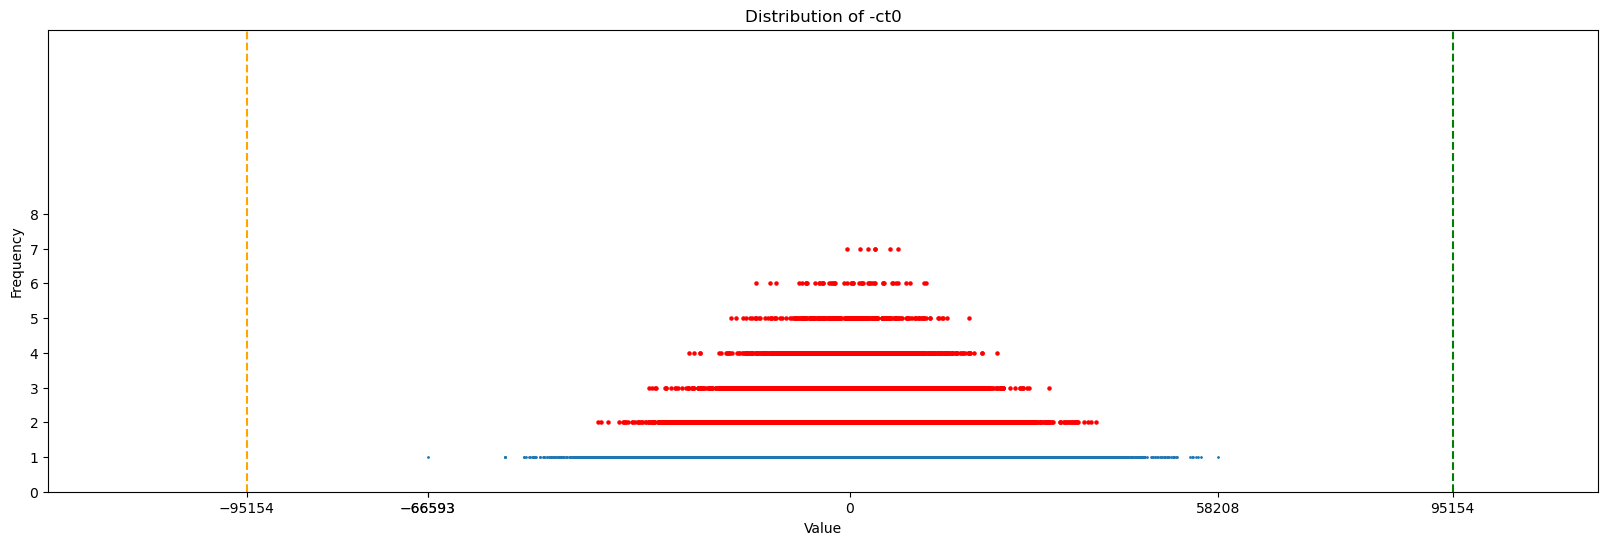

In [66]:
plt.figure(figsize=(20, 6))  # 设置图像大小，宽度为20，高度为6

# 绘制所有点
plt.scatter(x_values, y_values, s=1, label="All Points")  # 蓝色点表示所有数据

# 筛选出现次数超过一次的数值
highlight_x = [key for key, value in counter.items() if value > 1]
highlight_y = [counter[key] for key in highlight_x]

# 在 x 轴上标记这些数值为红色点
plt.scatter(highlight_x, highlight_y, s=5, color="red", label="Highlighted Points")  # 红色点表示出现次数超过一次的数值

# 设置 x 轴的刻度为最小值、0 和最大值，以及对称的负最大值
symmetric_max = max(abs(min(x_values)), abs(max(x_values)))
x_ticks = sorted([min(x_values), 0, max(x_values), -symmetric_max, basebound, -basebound])
plt.xticks(x_ticks)

# 为 x 轴和 y 轴添加额外的空间
x_margin = symmetric_max * 0.9  # x 轴留出 10% 的额外空间
y_margin = max(y_values) * 0.9  # y 轴留出 10% 的额外空间
plt.xlim(min(x_values) - x_margin, max(x_values) + x_margin)
plt.ylim(0, max(y_values) + y_margin)

# 设置 y 轴的刻度为整数
plt.yticks(range(0, max(y_values) + 2))

# 添加正负 basebound 的竖直虚线
plt.axvline(x=basebound, color="green", linestyle="--", label=f"basebound ({basebound})")
plt.axvline(x=-basebound, color="orange", linestyle="--", label=f"-basebound ({-basebound})")


# 设置标签和标题
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of -ct0")

# 显示图表
plt.show()

In [62]:
N(54374 / Dilithium2.tau)

1394.20512820513